In [ ]:
# install necessary packages; this may take some time
# "JM" contains the "aids" dataset we will be using for this coding problem
# "survminer" contains many useful functions for the survival analysis

install.packages("JM")
install.packages("survminer")
library("JM")
library("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: MASS

Loading required package: nlme

Loading required package: splines

Loading required package: survival

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




,patient,Time,death,CD4,obstime,drug,gender,prevOI,AZT,start,stop,event
,<fct>,<dbl>,<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
1,1,16.97,0,10.677078,0,ddC,male,AIDS,intolerance,0,6.0,0
2,2,19.00,0,6.324555,0,ddI,male,noAIDS,intolerance,0,6.0,0
3,3,18.53,1,3.464102,0,ddI,female,AIDS,intolerance,0,2.0,0
4,4,12.70,0,3.872983,0,ddC,male,AIDS,failure,0,2.0,0
5,5,15.13,0,7.280110,0,ddI,male,AIDS,failure,0,2.0,0
6,6,1.90,1,4.582576,0,ddC,female,AIDS,failure,0,1.9,1


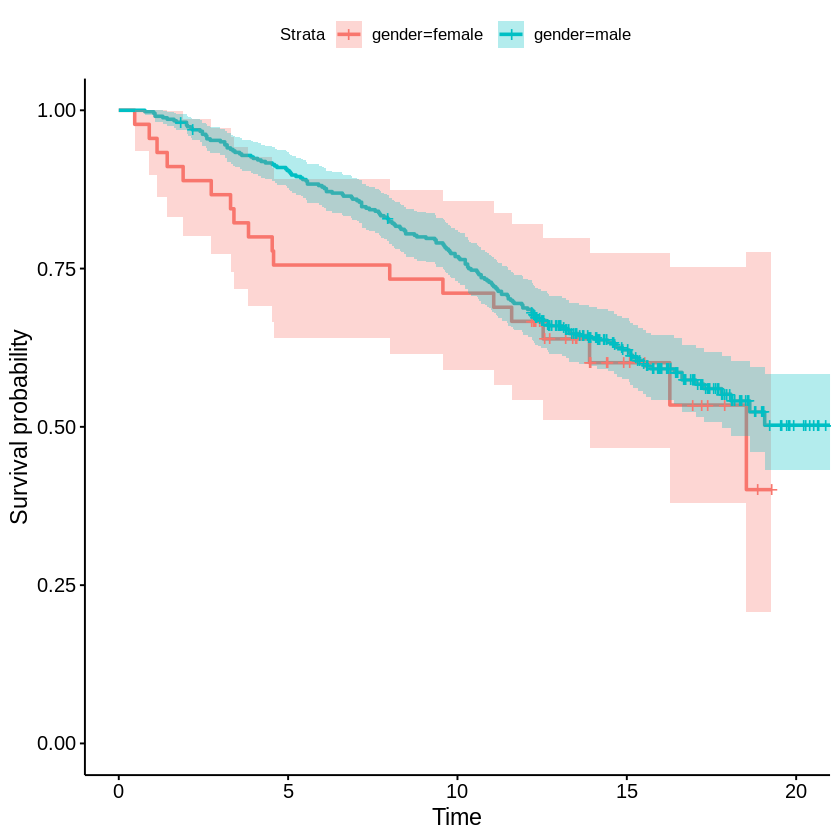

In [ ]:
# we will be using the "aids.id" dataset; look at the first few rows for an overview
# the explanations of the variables can be found at https://rdrr.io/cran/JM/man/aids.html
head(aids.id)

# YOUR CODE (~1-3 lines): from the aids.id data,
# plot the Kaplan-Meier curves for males and females (ignoring all other features), separately
# you should include both curves in the same plot, as well as confidence intervals
# note 1: it might be helpful to first construct a survival object using the "Surv" function
# note 2: it might be helpful to look up the "ggsurvplot" and "survfit" functions
# note 3: there might be more than one ways to implement it (using different functions/packages),
# and they are all fine as long as you are plotting the correct thing

surv_fit = survfit(Surv(time = aids.id$Time, event = aids.id$death) ~ aids.id$gender)
ggsurvplot(surv_fit, data = aids.id, conf.int = TRUE)

Call:
coxph(formula = Surv(Time, death) ~ gender, data = aids.id)

  n= 467, number of events= 188 

              coef exp(coef) se(coef)      z Pr(>|z|)
gendermale -0.1656    0.8474   0.2421 -0.684    0.494

           exp(coef) exp(-coef) lower .95 upper .95
gendermale    0.8474       1.18    0.5273     1.362

Concordance= 0.509  (se = 0.012 )
Likelihood ratio test= 0.45  on 1 df,   p=0.5
Wald test            = 0.47  on 1 df,   p=0.5
Score (logrank) test = 0.47  on 1 df,   p=0.5


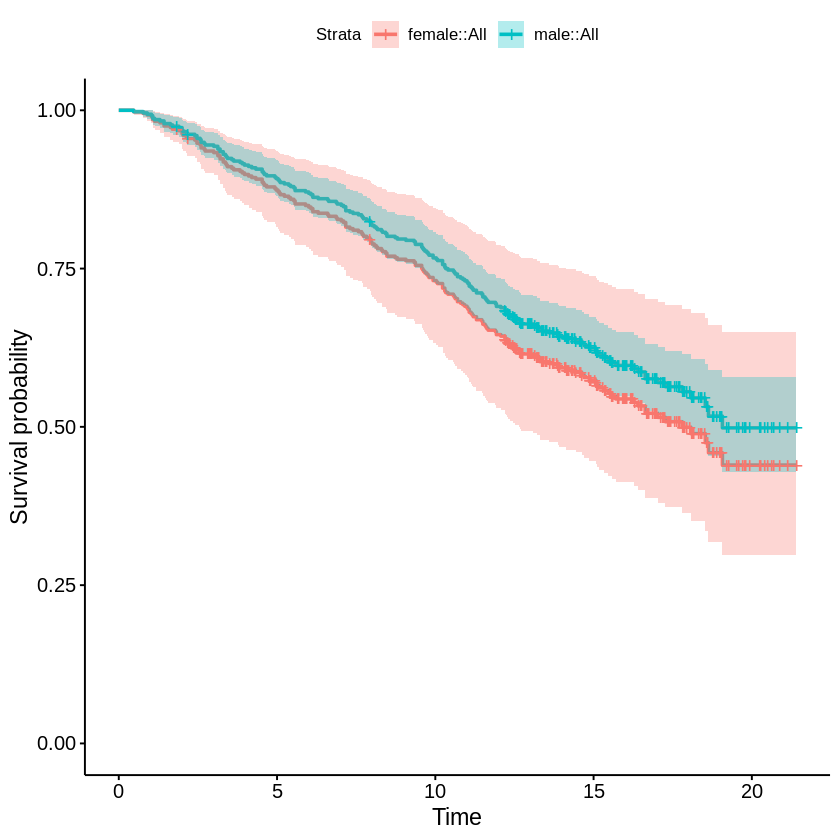

In [ ]:
# YOUR CODE (~1 line):
# fit a Cox model with "gender" being the only feature
# look at the fitted coefficient, as well as its significance
cox_model = coxph(Surv(Time, death) ~ gender, data = aids.id)
summary(cox_model)

# YOUR CODE (~3 lines):
# plot the fitted survival curves for males and females based on the Cox model
# you should include both curves in the same plot, as well as confidence intervals
# look at the differences from the above Kaplan-Meier curves
# note: the "ggsurvplot_combine" function might be useful to combine two plots

m = survfit(cox_model, newdata = data.frame(gender = "male"))
f = survfit(cox_model, newdata = data.frame(gender = "female"))

ggsurvplot_combine(list(female=f, male=m), conf.int = TRUE)

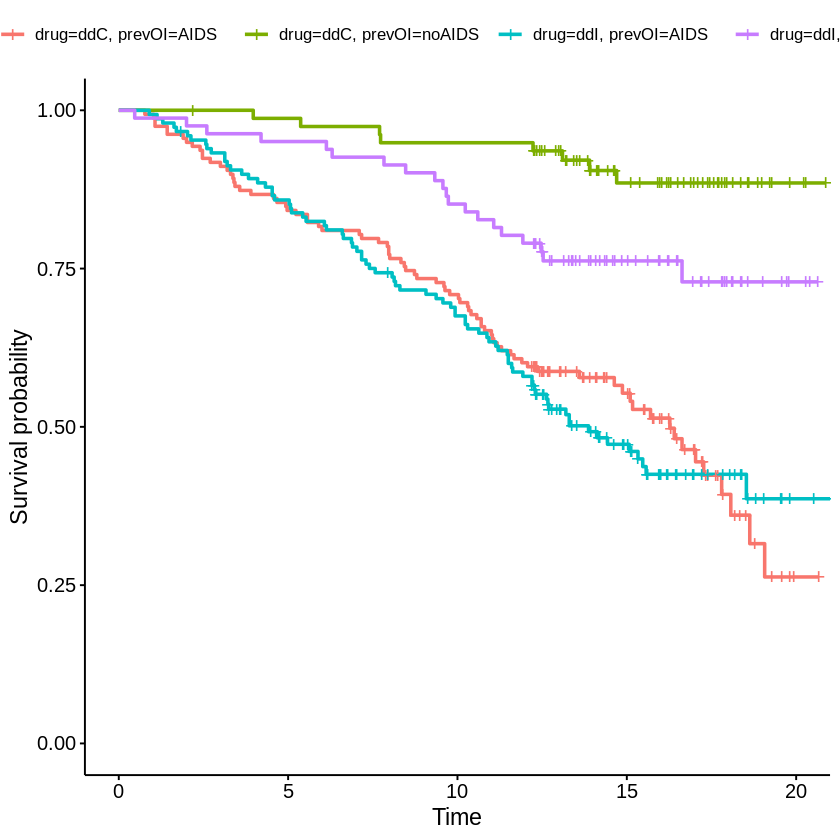

In [ ]:
# YOUR CODE (~1-2 lines):
# plot the Kaplan-Meier curves for all 4 possible combinations of (drug, prevOI), ignoring other features
# you should include all curves in the same plot (no confidence intervals needed)
# based on your plot, understand the effects of (drug, prevOI)

surv_fit2 = survfit(formula = Surv(time = aids.id$Time, event = aids.id$death) ~ (aids.id$drug + aids.id$prevOI))
ggsurvplot(surv_fit2, data = aids.id)

Call:
coxph(formula = Surv(Time, death) ~ (drug + prevOI), data = aids.id)

  n= 467, number of events= 188 

             coef exp(coef) se(coef)     z Pr(>|z|)    
drugddI    0.2060    1.2287   0.1462 1.409    0.159    
prevOIAIDS 1.3683    3.9288   0.2053 6.664 2.67e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
drugddI        1.229     0.8139    0.9226     1.636
prevOIAIDS     3.929     0.2545    2.6271     5.876

Concordance= 0.637  (se = 0.018 )
Likelihood ratio test= 61.1  on 2 df,   p=5e-14
Wald test            = 46.47  on 2 df,   p=8e-11
Score (logrank) test = 53.75  on 2 df,   p=2e-12


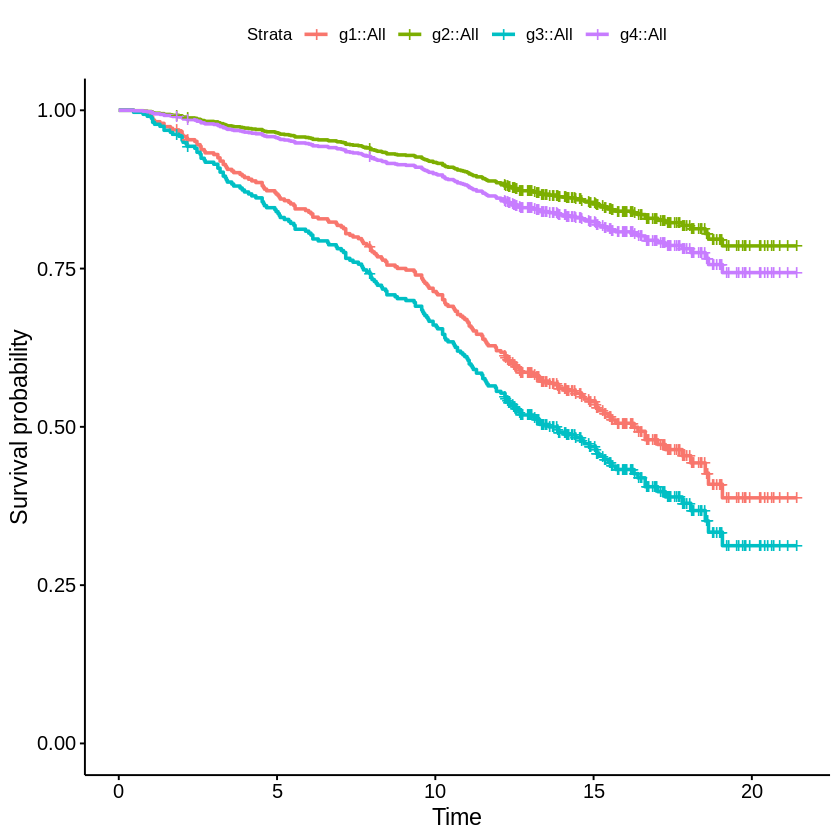

In [ ]:
# YOUR CODE (~1 line):
# fit a Cox model with two features (drug, prevOI)
# look at the fitted coefficients and their significance levels

cox_model2 = coxph(Surv(Time, death) ~ (drug + prevOI), data = aids.id)
summary(cox_model2)

# YOUR CODE (~5 lines):
# plot the fitted curves for all 4 possible combinations of (drug, prevOI)
# you should include all curves in the same plot (no confidence intervals needed)
# look at the differences from the above Kaplan-Meier curves

g1 = survfit(cox_model2, newdata = data.frame(drug = "ddC", prevOI = 'AIDS'))
g2 = survfit(cox_model2, newdata = data.frame(drug = "ddC", prevOI = 'noAIDS'))
g3 = survfit(cox_model2, newdata = data.frame(drug = "ddI", prevOI = 'AIDS'))
g4 = survfit(cox_model2, newdata = data.frame(drug = "ddI", prevOI = 'noAIDS'))

ggsurvplot_combine(list(g1=g1,g2=g2,g3=g3,g4=g4))

Call:
coxph(formula = Surv(Time, death) ~ (drug + prevOI + drug * prevOI), 
    data = aids.id)

  n= 467, number of events= 188 

                      coef exp(coef) se(coef)      z Pr(>|z|)    
drugddI             1.0161    2.7624   0.4184  2.428   0.0152 *  
prevOIAIDS          1.9422    6.9739   0.3713  5.231 1.69e-07 ***
drugddI:prevOIAIDS -0.9418    0.3899   0.4474 -2.105   0.0353 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
drugddI               2.7624     0.3620    1.2165    6.2729
prevOIAIDS            6.9739     0.1434    3.3683   14.4390
drugddI:prevOIAIDS    0.3899     2.5647    0.1622    0.9371

Concordance= 0.637  (se = 0.018 )
Likelihood ratio test= 65.91  on 3 df,   p=3e-14
Wald test            = 43.39  on 3 df,   p=2e-09
Score (logrank) test = 54.45  on 3 df,   p=9e-12


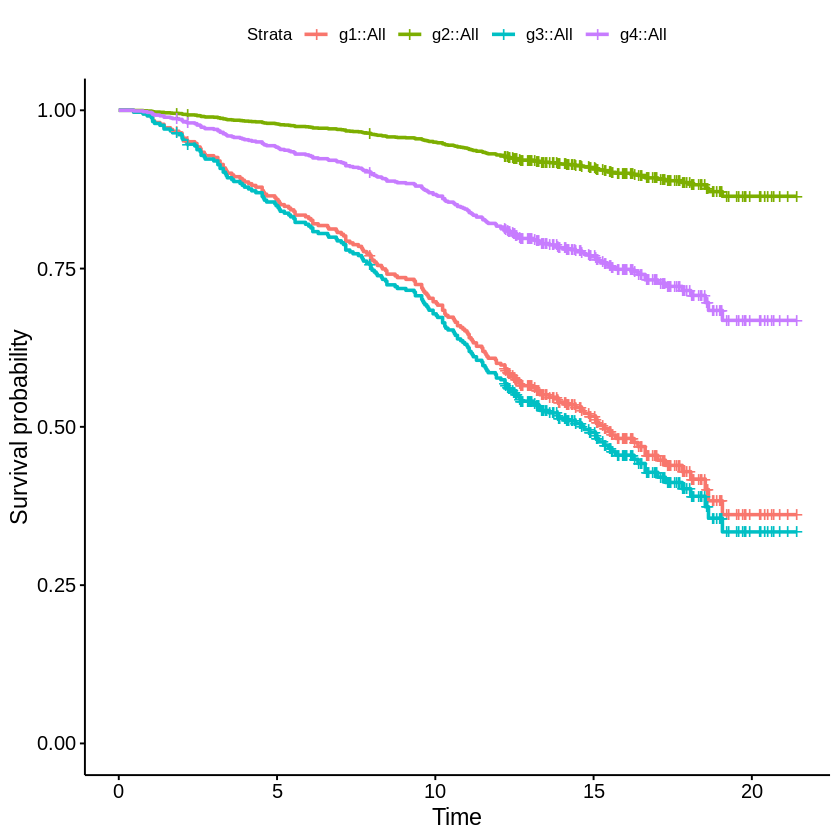

In [ ]:
# YOUR CODE (~1 line):
# fit another Cox model with features (drug, prevOI), as well as the interaction drug * prevOI
# look at the fitted coefficients and their significance levels

cox_model3 = coxph(Surv(Time, death) ~ (drug + prevOI+drug*prevOI), data = aids.id)
summary(cox_model3)

# YOUR CODE (~5 lines):
# plot the fitted curves for all 4 possible combinations of (drug, prevOI)
# you should include all curves in the same plot (no confidence intervals needed)
# look at the differences from the above Cox model without interaction

g1 = survfit(cox_model3, newdata = data.frame(drug = "ddC", prevOI = 'AIDS'))
g2 = survfit(cox_model3, newdata = data.frame(drug = "ddC", prevOI = 'noAIDS'))
g3 = survfit(cox_model3, newdata = data.frame(drug = "ddI", prevOI = 'AIDS'))
g4 = survfit(cox_model3, newdata = data.frame(drug = "ddI", prevOI = 'noAIDS'))

ggsurvplot_combine(list(g1=g1,g2=g2,g3=g3,g4=g4))

### Code Link
https://colab.research.google.com/drive/1vVxlsLDFAEP8snzGAA8dKZJUVYU8In-y?usp=sharing